<a href="https://colab.research.google.com/github/jonahsjlee/programming/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

#header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15'}
url = 'https://charlottesville.craigslist.org/search/vga#search=1~gallery~0~15'
raw = requests.get(url,headers=header) # Get page

In [19]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [69]:
import re

consoles = ['playstation', 'nintendo', 'xbox']

data = []
for k in range(len(listings)):
    title = listings[k].find('div', class_='title').get_text().lower()
    price = listings[k].find('div', class_='price').get_text()

    # Check if location exists
    location_tag = listings[k].find('div', class_='location')
    if location_tag is not None:
        location = location_tag.get_text().strip()[:5]
    else:
        location = 'N/A'  # Set a default value if location is missing

    link = listings[k].find('a', href=True)['href']  # Fix: 'a' tag with 'href' attribute
    link = listings[k].find(href=True)['href']

    # Get brand from the title string:
    words = title.split()

    if re.search(r'\bps[34]?\b', title):  # Detect 'ps3', 'ps4', or 'ps'
        brand = 'playstation'
    else:
        hits = [word for word in words if word in consoles]
        if len(hits) == 0:
            brand = 'missing'
        else:
            brand = hits[0]

    # Append data to the list
    data.append({'title': title, 'price': price, 'link': link, 'consoles': brand, 'location': location})

print(data)


[{'title': 'lots of cheap playstation 4 games (some sealed!) all work on ps4/ps5!', 'price': '$10', 'link': 'https://charlottesville.craigslist.org/vgm/d/staunton-lots-of-cheap-playstation/7785053818.html', 'consoles': 'playstation', 'location': 'Staun'}, {'title': 'ps vita games', 'price': '$10', 'link': 'https://charlottesville.craigslist.org/vgm/d/staunton-ps-vita-games/7781356366.html', 'consoles': 'playstation', 'location': 'Staun'}, {'title': 'mass effect 3 ps3 game excellent condition', 'price': '$5', 'link': 'https://charlottesville.craigslist.org/vgm/d/staunton-mass-effect-ps3-game-excellent/7785054513.html', 'consoles': 'playstation', 'location': 'Staun'}, {'title': '► penguin wars ps4 rare game', 'price': '$20', 'link': 'https://charlottesville.craigslist.org/vgm/d/charlottesville-penguin-wars-ps4-rare/7783268104.html', 'consoles': 'playstation', 'location': 'Staun'}, {'title': 'cod modern warfare 2 ps3 game call of duty modern warfare 2', 'price': '$5', 'link': 'https://cha

In [70]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['location'] = df['location'].str.strip()[:5]
df['price'] = pd.to_numeric(df['price'],errors='coerce')
#df['year'] = pd.to_numeric(df['year'],errors='coerce')
df.to_csv('craigslist_cville_cars.csv') # Save data in case of a disaster
df.head()

,title,price,link,consoles,location
0,lots of cheap playstation 4 games (some sealed...,10,https://charlottesville.craigslist.org/vgm/d/s...,playstation,Staun
1,ps vita games,10,https://charlottesville.craigslist.org/vgm/d/s...,playstation,Staun
2,mass effect 3 ps3 game excellent condition,5,https://charlottesville.craigslist.org/vgm/d/s...,playstation,Staun
3,► penguin wars ps4 rare game,20,https://charlottesville.craigslist.org/vgm/d/c...,playstation,Staun
4,cod modern warfare 2 ps3 game call of duty mod...,5,https://charlottesville.craigslist.org/vgm/d/s...,playstation,Staun


<ipython-input-72-d28cd2919068>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='price', y='location', inner='stick', palette='Dark2')


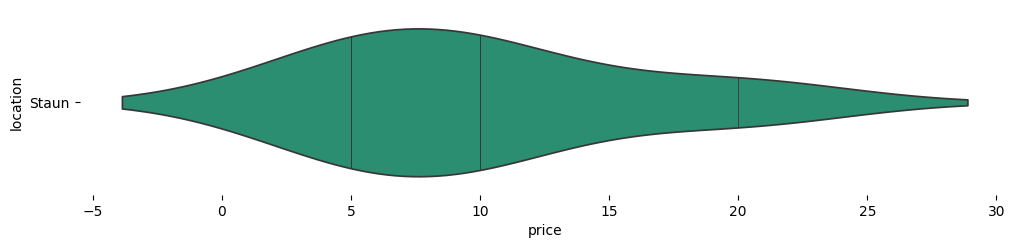

In [72]:
# @title location vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='price', y='location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

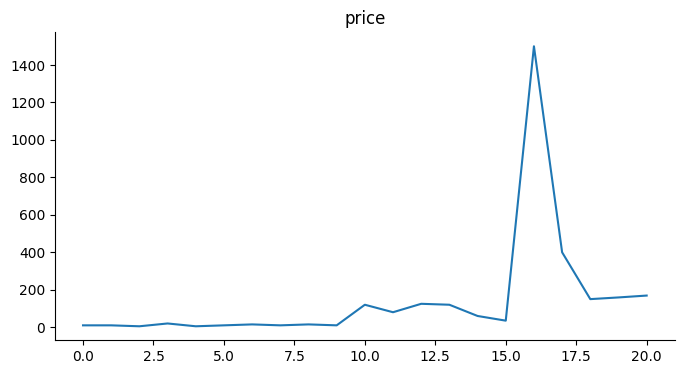

In [71]:

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

count      21.000000
mean      144.190476
std       324.559951
min         5.000000
25%        10.000000
50%        35.000000
75%       125.000000
max      1500.000000
Name: price, dtype: float64


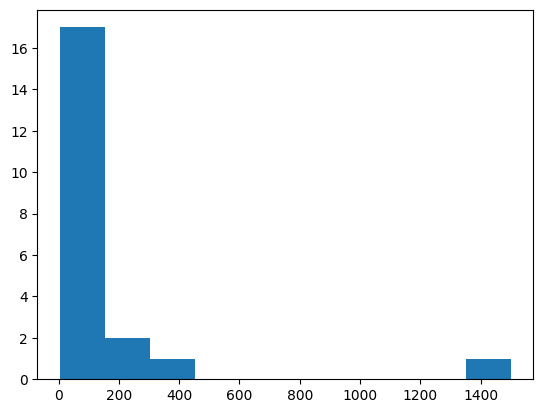

In [64]:
# EDA for price:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

In [73]:
# Price by brand:
df.loc[:,['price','consoles']].groupby('consoles').describe()

price                                                        \
            count        mean         std    min     25%    50%     75%   
consoles                                                                  
missing       4.0  480.000000  704.414651   10.0   10.00  205.0  675.00   
nintendo      8.0   87.500000   49.280538   10.0   53.75  100.0  121.25   
playstation   7.0   11.428571    5.563486    5.0    7.50   10.0   15.00   
xbox          2.0  164.000000    7.071068  159.0  161.50  164.0  166.50   

                     
                max  
consoles             
missing      1500.0  
nintendo      150.0  
playstation    20.0  
xbox          169.0